# Homework 2: Group 1

#### Abraham Alhomadi, Emily Blake, David Jung, Spencer Powell, Ryan Voges

# Explanatory Data Analysis: EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv.zip', sep=',')

In [3]:
df.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2     6625000  2017-07-19 00:00:00  
1                              C7         -    2016-12-14 00:00:00  
2                              C7         -    2016-12-09 00:00:00  
3                              C4     3936272  2016-09-23 00:00:00  
4                              C2     8000000  2016-11-17 00:00:00  

[5 rows x 22 columns]

In [4]:
df.shape

(84548, 22)

### The data set is comprised of 8,4548 observations and 12 characteristics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
for col in df.columns:
    print(col, df[col].nunique())

Unnamed: 0 26736
BOROUGH 5
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BLOCK 11566
LOT 2627
EASE-MENT 1
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
ZIP CODE 186
RESIDENTIAL UNITS 176
COMMERCIAL UNITS 55
TOTAL UNITS 192
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
YEAR BUILT 158
TAX CLASS AT TIME OF SALE 4
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [7]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
categorical = ["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT"]

In [9]:
categoricals = list(df.drop(['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'SALE DATE'], axis=1).columns)
print(categoricals)                    

['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']


In [10]:
numerical = ['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
print(numerical)

['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']


In [11]:
df['SALE DATE']

0        2017-07-19 00:00:00
1        2016-12-14 00:00:00
2        2016-12-09 00:00:00
3        2016-09-23 00:00:00
4        2016-11-17 00:00:00
                ...         
84543    2016-11-28 00:00:00
84544    2017-04-21 00:00:00
84545    2017-07-05 00:00:00
84546    2016-12-21 00:00:00
84547    2016-10-27 00:00:00
Name: SALE DATE, Length: 84548, dtype: object

In [12]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [13]:
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'], df['sale_year'])

sale_year   2016  2017
sale_month            
1              0  6871
2              0  6323
3              0  7705
4              0  6402
5              0  7461
6              0  8293
7              0  6319
8              0  5681
9           7779     0
10          6751     0
11          7072     0
12          7891     0

In [14]:
for col in categoricals:
    df[col]=df[col].astype("category")

In [15]:
for col in numerical:
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  category      
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  category      
 9   APARTMENT NUMBER                84548 non-null  category      
 10  ZIP CODE                        84548 non-null  category      
 11  RE

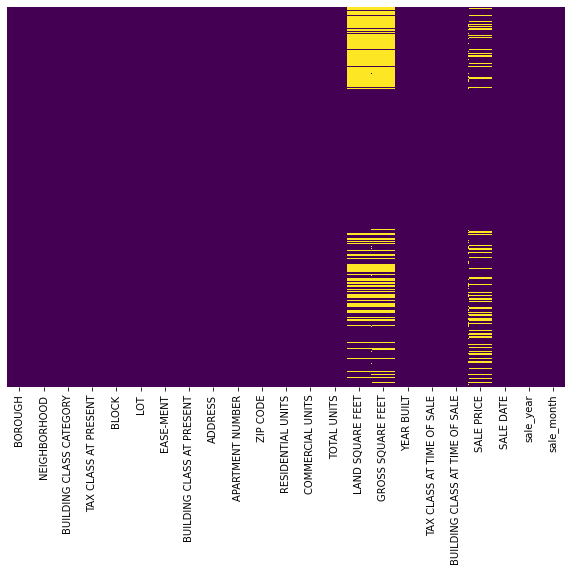

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [18]:
df.isnull().sum() / len(df)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.000000
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         0.000000
BUILDING CLASS AT PRESENT         0.000000
ADDRESS                           0.000000
APARTMENT NUMBER                  0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310498
GROSS SQUARE FEET                 0.326584
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172222
SALE DATE                         0.000000
sale_year                         0.000000
sale_month                        0.000000
dtype: floa

In [19]:
df.replace(' ', np.nan, inplace=True)
df.isnull().sum() / len(df)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.008729
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         1.000000
BUILDING CLASS AT PRESENT         0.008729
ADDRESS                           0.000000
APARTMENT NUMBER                  0.774661
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310498
GROSS SQUARE FEET                 0.326584
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172222
SALE DATE                         0.000000
sale_year                         0.000000
sale_month                        0.000000
dtype: floa

In [20]:
df.drop(['EASE-MENT', 'APARTMENT NUMBER'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ADDRESS                         84548 non-null  category      
 8   ZIP CODE                        84548 non-null  category      
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

In [24]:
df.dropna( inplace=True)

In [26]:
sum(df.duplicated())

348

In [28]:
df.drop_duplicates(inplace=True)

In [30]:
sum(df.duplicated())

0

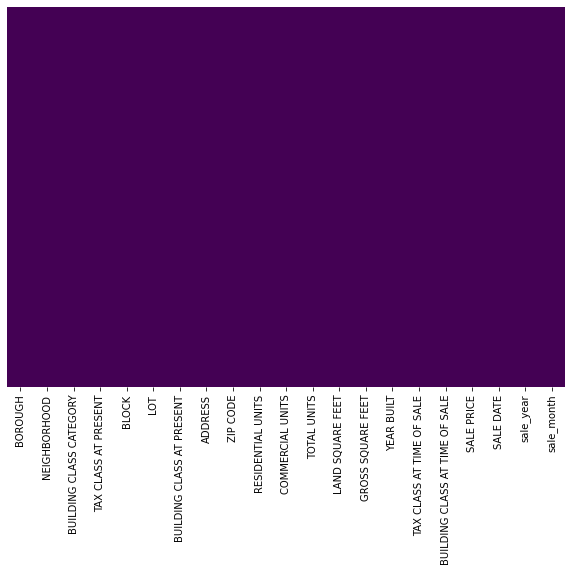

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()